# Решающие деревья

Эмели Драль, mailto: emeli.dral@gmail.com

**Примечание:**

Для данного блокнота понадобятся pydotplus (питоновский модуль) и GraphViz

На macOS это решается так:

sudo pip install pydotplus

brew install graphviz

В linux должно работать то же самое с заменой brew на sudo apt-get

В windows нужно сначала установить graphviz отсюда: http://www.graphviz.org/Download_windows.php

Затем добавить путь к папке bin в PATH (например, "C:\Programs\Graphviz2.38\bin")

После чего выполнить pip install pydotplus

In [1]:
import pydotplus 
import pandas as pd

from IPython.display import Image
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Ирисы Фишера

In [2]:
iris = load_iris()

## Организуем данные в виде таблицы

In [4]:
iris_data = pd.DataFrame(iris.data)
iris_data.columns = iris.feature_names
iris_data['target'] = iris.target

In [5]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Строим дерево "руками"

In [12]:
#iris_sample = iris_data.sample(n = 13, random_state = 111)
iris_sample = iris_data.sample(n = 23, random_state = 111)

In [24]:
iris_sample.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
39,5.1,3.4,1.5,0.2,0
26,5.0,3.4,1.6,0.4,0
109,7.2,3.6,6.1,2.5,2
123,6.3,2.7,4.9,1.8,2
77,6.7,3.0,5.0,1.7,1


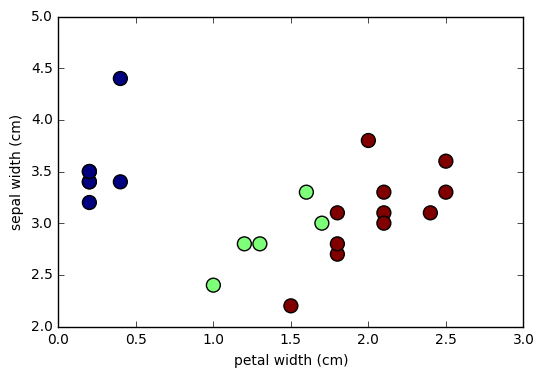

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(iris_sample["petal width (cm)"], iris_sample["sepal width (cm)"], c=iris_sample["target"], s=100)
plt.xlabel("petal width (cm)")
plt.ylabel("sepal width (cm)")

## Строим дерево с помощью sklearn

In [13]:
model = tree.DecisionTreeClassifier()
model.fit(iris_sample.iloc[:, :-1], iris_sample.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [14]:
dot_data = tree.export_graphviz(model, out_file="small_tree.out", 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  

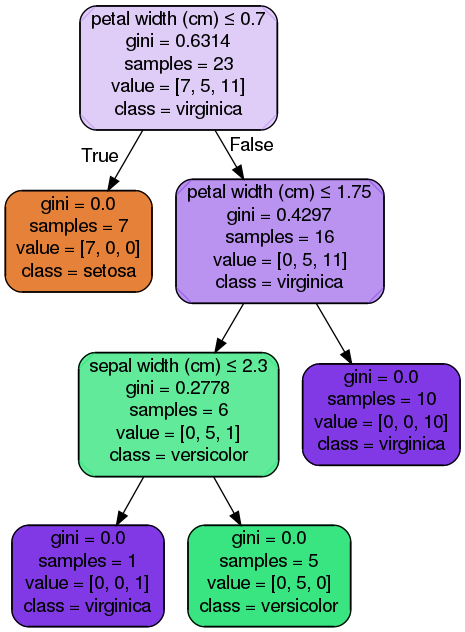

In [15]:
graph = pydotplus.graphviz.graph_from_dot_file("small_tree.out")  
Image(graph.create_png())  

## Возьмем побольше данных

In [13]:
model.fit(iris_data.iloc[:, :-1], iris_data.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [14]:
dot_data = tree.export_graphviz(model, out_file="big_tree.out", 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  

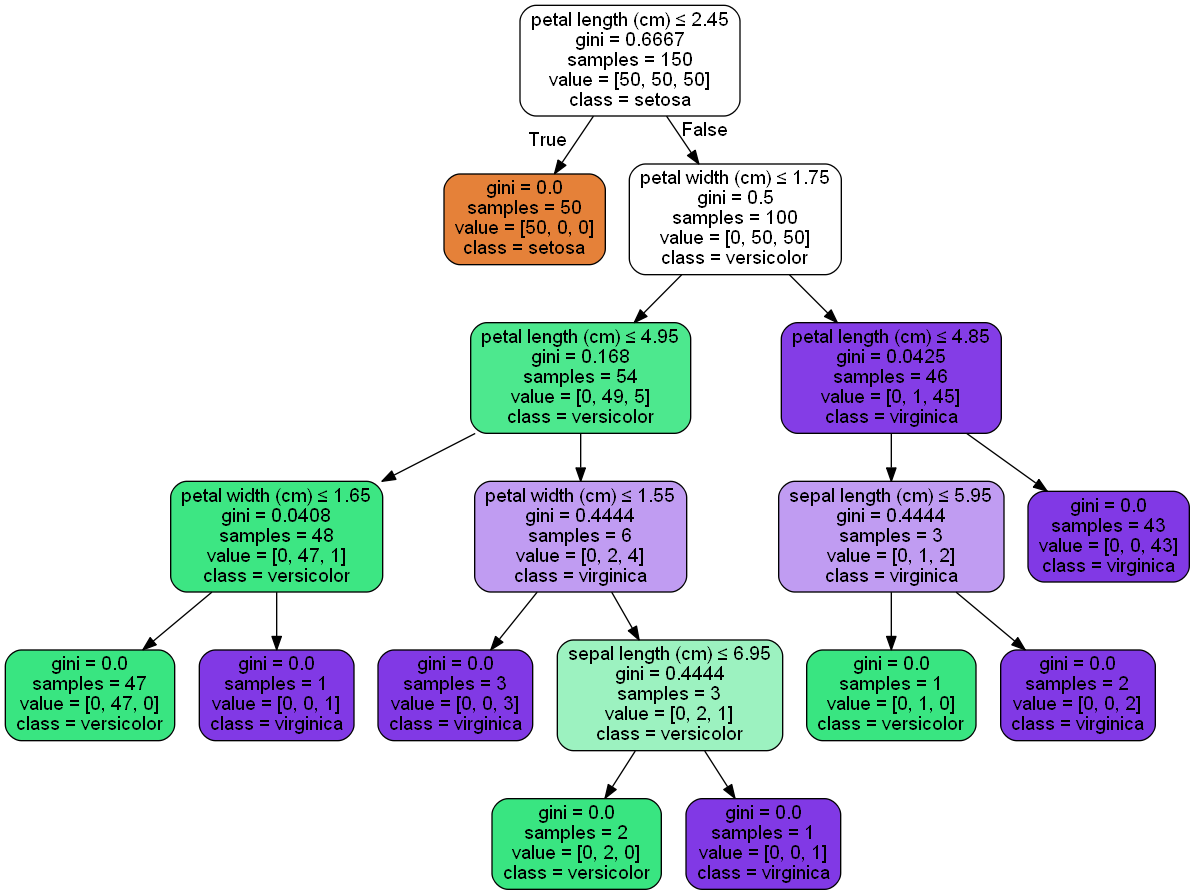

In [15]:
graph = pydotplus.graphviz.graph_from_dot_file("big_tree.out")  
Image(graph.create_png())  

## Оценим качество

In [16]:
train_data, test_data, train_target, test_target = train_test_split(iris_data.iloc[:, :-1], iris_data.target,
                                                                   test_size = 0.2)

In [17]:
model.fit(train_data, train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [18]:
test_predictions = model.predict(test_data)

In [19]:
print test_predictions

[2 2 0 1 1 2 2 2 2 1 2 1 2 0 1 1 2 0 0 0 1 1 0 2 1 2 1 2 2 2]


In [20]:
print test_target.values

[2 2 0 1 1 2 2 2 2 2 2 1 2 0 1 1 2 0 0 0 2 1 0 2 1 2 1 1 2 2]


In [21]:
print accuracy_score(test_target, test_predictions)

0.9


In [22]:
train_predictions = model.predict(train_data)

In [23]:
print accuracy_score(train_target, train_predictions)

1.0


In [24]:
print classification_report(test_target, test_predictions)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         6
          1       0.80      0.89      0.84         9
          2       0.93      0.87      0.90        15

avg / total       0.90      0.90      0.90        30



In [25]:
dot_data = tree.export_graphviz(model, out_file="tree.out", 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True) 

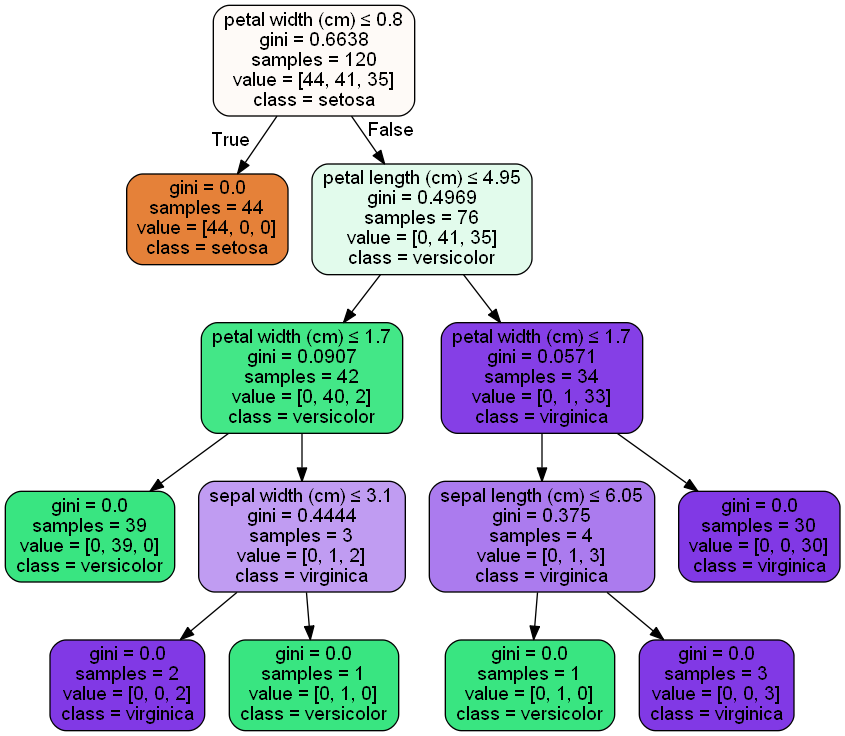

In [26]:
graph = pydotplus.graphviz.graph_from_dot_file("tree.out")  
Image(graph.create_png())  

## Исследуем "устойчивость" модели

**Вариант 1:** деревья, построенные на немного отличающихся подмножествах обучающей выборки

См. пункт 2 в списке недостатков деревьев в документации sklearn: http://scikit-learn.org/stable/modules/tree.html

In [27]:
model = tree.DecisionTreeClassifier(max_depth=4)
print len(train_data)

120


Построим два решающих дерева: одно выкинув из обучающей выборки diff последних примеров, другое - выкинув из нее diff первых примеров.

При diff = 10 (8,3% выборки) структура дерева такая же, при diff = 20 (16,6%) дерево уже выглядит по-другому и, кроме того, есть различия даже в выборе признака в одном из верхних сплитов

In [28]:
diff = 20

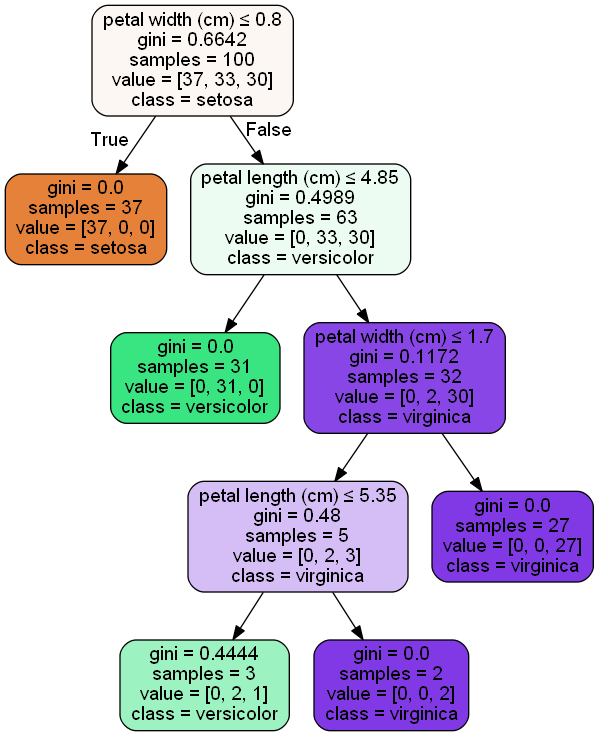

In [29]:
model.fit(train_data[:-20], train_target[:-20])
filename = "first_tree.out"
dot_data = tree.export_graphviz(model, out_file=filename, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = pydotplus.graphviz.graph_from_dot_file(filename)  
Image(graph.create_png())  

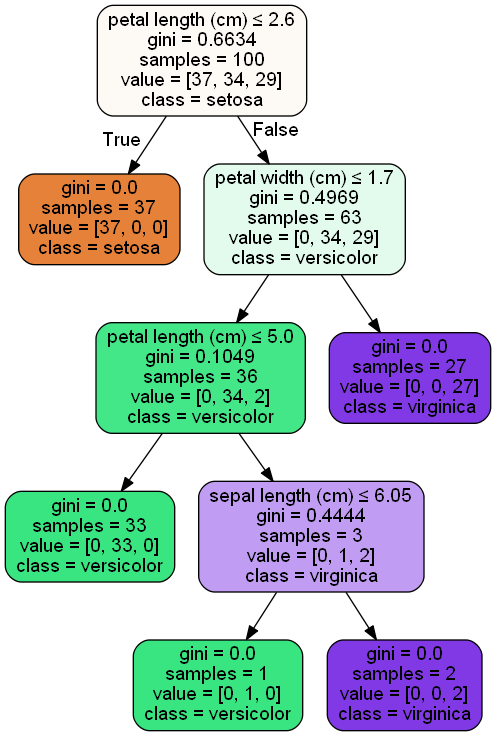

In [30]:
model.fit(train_data[20:], train_target[20:])
filename = "first_tree.out"
dot_data = tree.export_graphviz(model, out_file=filename, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = pydotplus.graphviz.graph_from_dot_file(filename)  
Image(graph.create_png())  

In [31]:
from sklearn.datasets import load_diabetes

In [32]:
diabetes = load_diabetes()

## Просто построим регрессионное дерево

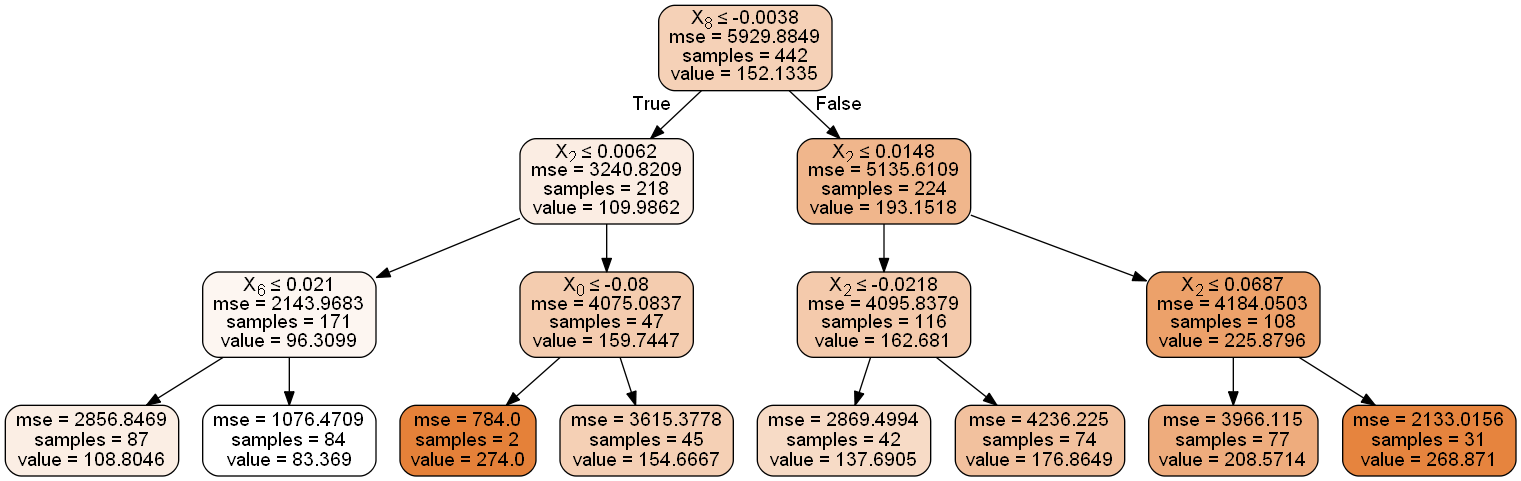

In [33]:
model = tree.DecisionTreeRegressor(max_depth=3)
model.fit(diabetes.data, diabetes.target)
filename = "diabetes_tree.out"
dot_data = tree.export_graphviz(model, out_file=filename, 
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = pydotplus.graphviz.graph_from_dot_file(filename)  
Image(graph.create_png())  

## Удалим часть выборки (эффект такой же как в классификации)

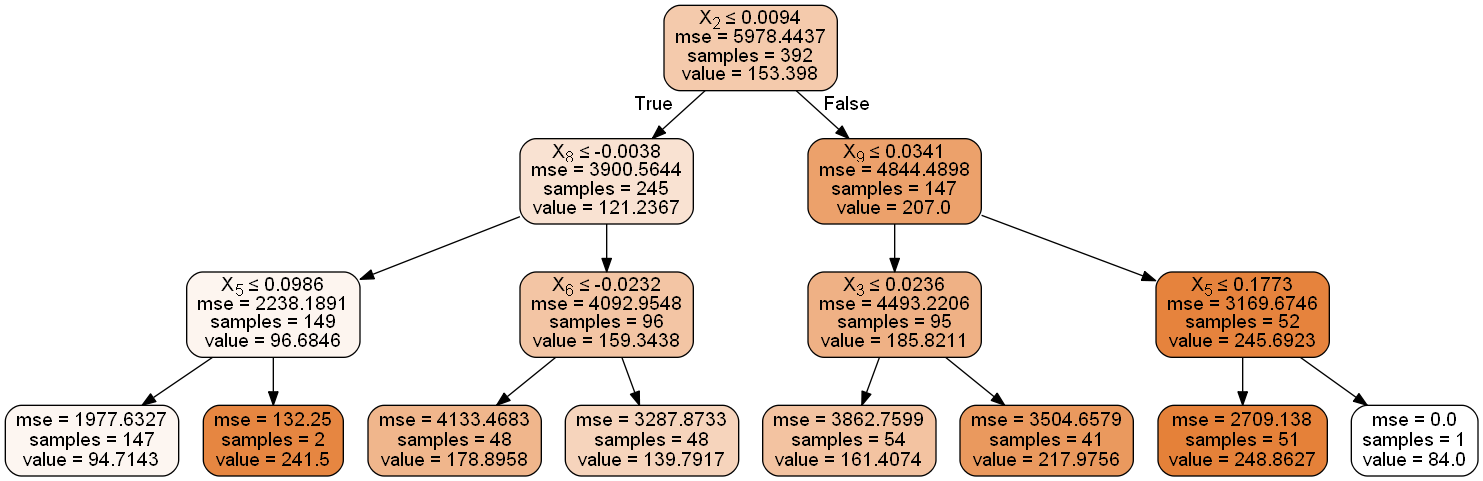

In [34]:
model = tree.DecisionTreeRegressor(max_depth=3)
model.fit(diabetes.data[50:], diabetes.target[50:])
filename = "diabetes_tree.out"
dot_data = tree.export_graphviz(model, out_file=filename, 
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = pydotplus.graphviz.graph_from_dot_file(filename)  
Image(graph.create_png())  

Теперь удалим немножко выборки (тогда будет почти исходное дерево)

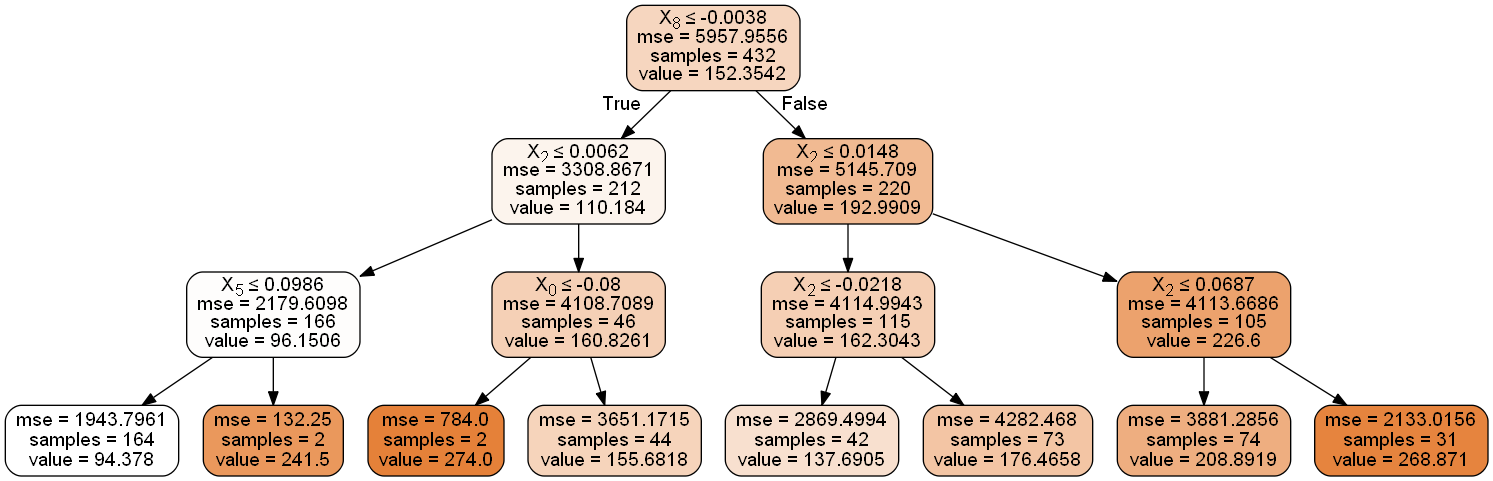

In [35]:
model = tree.DecisionTreeRegressor(max_depth=3)
model.fit(diabetes.data[10:], diabetes.target[10:])
filename = "diabetes_tree.out"
dot_data = tree.export_graphviz(model, out_file=filename, 
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = pydotplus.graphviz.graph_from_dot_file(filename)  
Image(graph.create_png())  

## Добавим выбросы - ответы первых 10 точек заменим на случайные (дерево изменится)

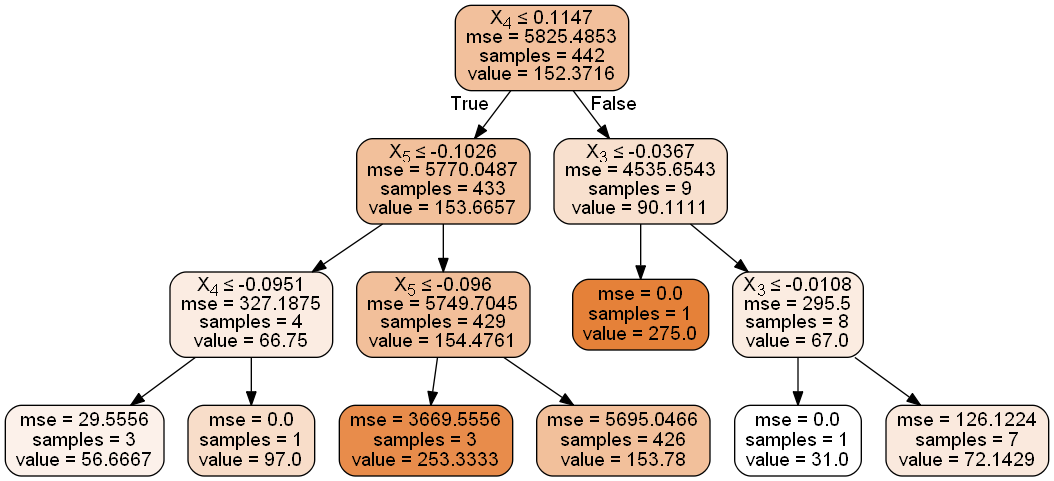

In [36]:
model = tree.DecisionTreeRegressor(max_depth=3)
model.fit(diabetes.data, list(diabetes.target[10:]) + list(np.random.normal(loc=150, scale=20, size=10)))
filename = "diabetes_tree.out"
dot_data = tree.export_graphviz(model, out_file=filename, 
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = pydotplus.graphviz.graph_from_dot_file(filename)  
Image(graph.create_png())  

## Увеличим дисперсию шума (при небольшом увеличении дерево особо не поменялось)

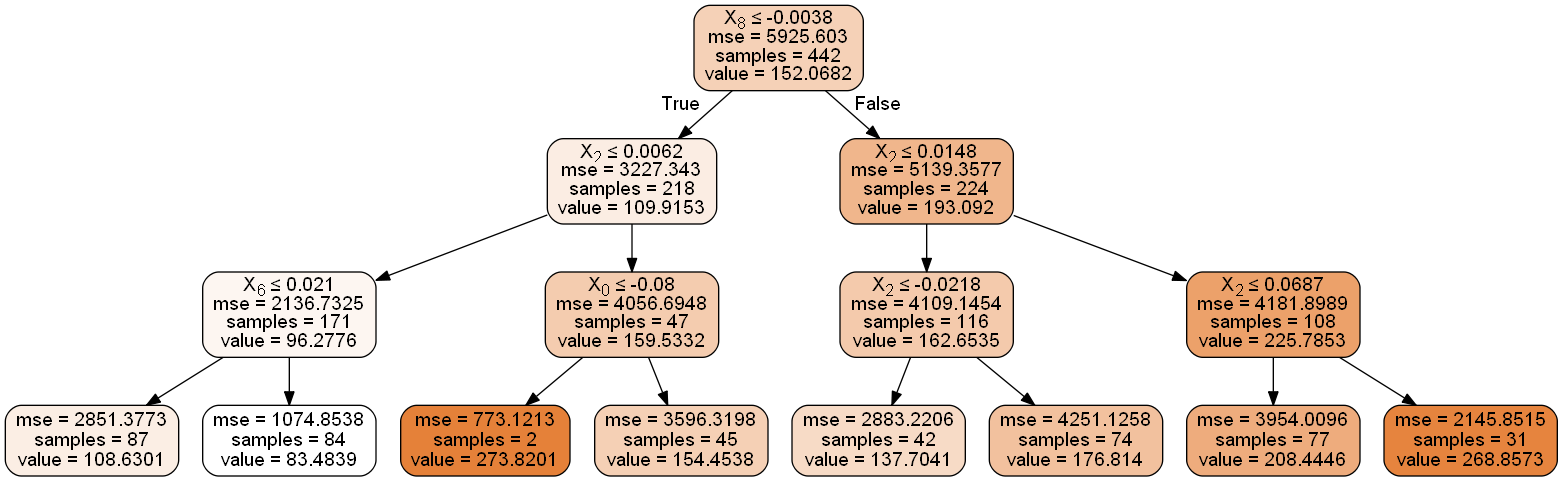

In [37]:
model = tree.DecisionTreeRegressor(max_depth=3)
model.fit(diabetes.data, diabetes.target + np.random.normal(scale=1, size=len(diabetes.target)))
filename = "diabetes_tree.out"
dot_data = tree.export_graphviz(model, out_file=filename, 
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = pydotplus.graphviz.graph_from_dot_file(filename)  
Image(graph.create_png())  

## Увеличим дисперcию более существенно (дерево конечно меняется, но сильных изменений не по-прежнему происходит)

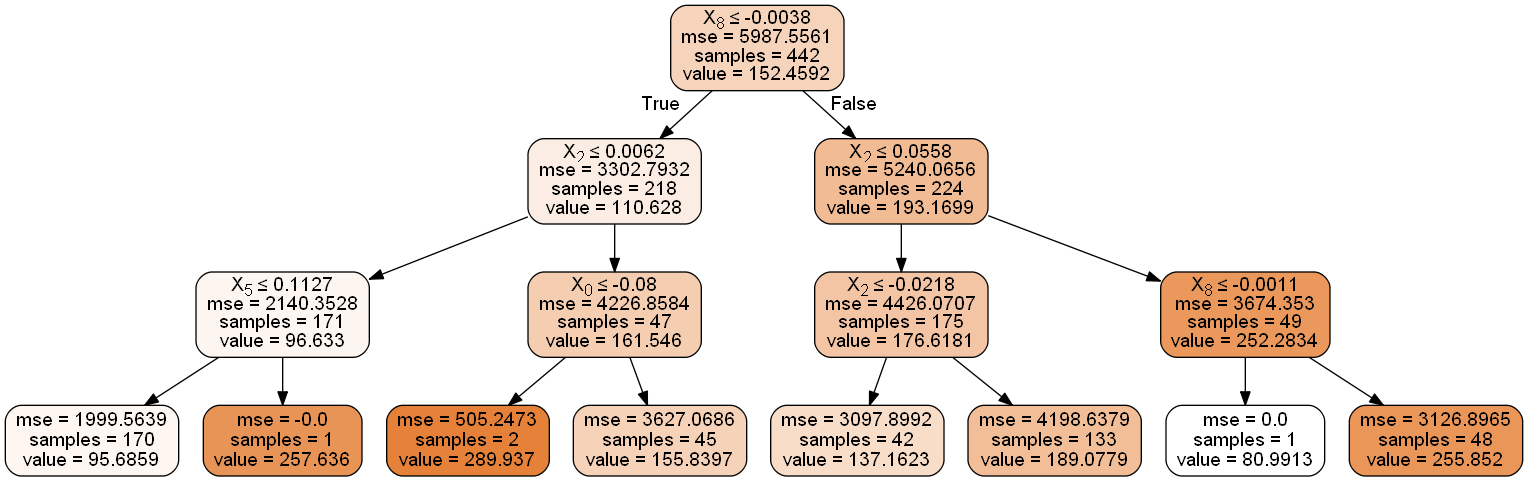

In [39]:
model = tree.DecisionTreeRegressor(max_depth=3)
model.fit(diabetes.data, diabetes.target + np.random.normal(scale=10, size=len(diabetes.target)))
filename = "diabetes_tree.out"
dot_data = tree.export_graphviz(model, out_file=filename, 
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = pydotplus.graphviz.graph_from_dot_file(filename)  
Image(graph.create_png())  

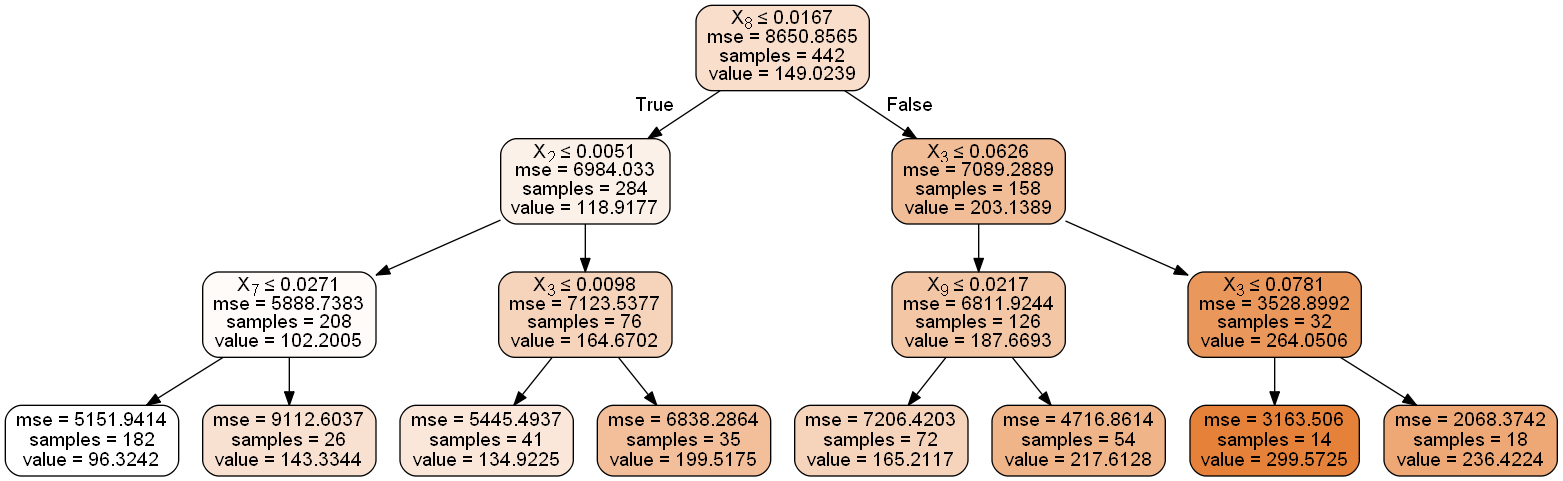

In [40]:
model = tree.DecisionTreeRegressor(max_depth=3)
model.fit(diabetes.data, diabetes.target + np.random.normal(scale=50, size=len(diabetes.target)))
filename = "diabetes_tree.out"
dot_data = tree.export_graphviz(model, out_file=filename, 
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = pydotplus.graphviz.graph_from_dot_file(filename)  
Image(graph.create_png())  